<a href="https://colab.research.google.com/github/leuoo/gnbai20201/blob/master/lab3/Leejk/gnbai_lab3_Leejk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# GNB AI 프로젝트 4주차 실습
# MLP

## 1.Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
## 2.Load data
columns = ['x1', 'x2', 'y']
data=pd.read_csv("/content/data_lab3.txt", names=columns, sep=' ')
data


,x1,x2,y
0,1.964300,4.5957,1
1,2.275300,3.8589,1
2,2.978100,4.5651,1
3,2.932000,3.5519,1
4,3.577200,2.8560,1
5,4.015000,3.1937,1
6,3.381400,3.4291,1
7,3.911300,4.1761,1
8,2.782200,4.0431,1
9,2.551800,4.6162,1


In [83]:
### 3. Define x  ((순전파 : Forward propagation))

data_np=np.asarray(data)

# shuffle data
np.random.shuffle(data_np)

#define x
x=data_np[:, :2]  

#define y
labels=data_np[:, 2].astype(np.int)
y=np.identity(2)[labels]

labels

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1])

In [84]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [0]:
#define I, N, J, K

I, N = x.shape  #unpacking
J = y.shape[1]
K = 5


In [0]:
# x_bar
x_bar = np.hstack((np.ones((I, 1)),x)) # 원본 data 안 바뀜

#initialize parameters  ... v , w  ((다층 퍼셉트론의 가중치들))
v = np.random.rand(N+1, K)
w = np.random.rand(K+1, J)


In [87]:
v

array([[0.66196811, 0.56379117, 0.76370137, 0.84416622, 0.55372047],
       [0.60758776, 0.7718191 , 0.64032109, 0.89283961, 0.67002013],
       [0.19043052, 0.54150943, 0.17097929, 0.69101257, 0.44946041]])

In [88]:
w

array([[0.35248312, 0.01279173],
       [0.44095518, 0.82732403],
       [0.99751413, 0.30242752],
       [0.74570368, 0.68004336],
       [0.81504485, 0.86220046],
       [0.78111143, 0.50506517]])

In [0]:
## 4. Train

# define hyper_parameters

alpha1 = 0.01
alpha2 = 0.01

max_epoch = 3000   #반복횟수

In [0]:
def sigmoid(z):
    return 1./(np.ones_like(z)+np.exp(-z))
                    #뒤에 오는 거랑 같은 행렬크기 만들고 1로 다 채움

In [0]:
def SSE(g, y):
    result=0.
    for i in range(g.shape[0]):
        for j in range(g.shape[1]):
            result += (g[i, j]-y[i, j])**2
    return result/2.

In [92]:
for epoch in range(max_epoch): 
  #forward propagation
  x_bar_bar = np.dot(x_bar, v)
  F = sigmoid(x_bar_bar)
  F_bar = np.hstack((np.ones((I, 1)), F))
  F_bar_bar =  np.dot(F_bar, w)
  G = sigmoid(F_bar_bar)

  #back propagation

  #출력층 단계
  for k in range(0, K+1):
      for j in range(0, J):
          for i in range(0, I):
            w[k, j] -= alpha1*(G[i,j]-y[i,j])*G[i, j]*(1-G[i, j])*F_bar[i, k]

  #은닉층 단계
  for n in range(0, N+1):
      for k in range(0, K):
          for i in range(0, I):
              for j in range(0, J):
                  v[n, k] -= alpha2*(G[i,j]-y[i,j])*G[i, j]*(1-G[i, j])*w[k, j]*F[i, k]*(1-F[i, k])*x_bar[i, n]
  error = SSE(G,y)
  if epoch % 100==0:
    print("epoch: %d, error : %.2f" %(epoch, error))  #error가 작아지게 나타나는데
   # 좋은 점이 아니다. 내가 준 data에만 맞게 과적합이 일어날수 있다.

epoch: 0, error : 23.78
epoch: 100, error : 12.38
epoch: 200, error : 12.39
epoch: 300, error : 12.40
epoch: 400, error : 12.35
epoch: 500, error : 12.28
epoch: 600, error : 12.19
epoch: 700, error : 12.09
epoch: 800, error : 11.97
epoch: 900, error : 11.84
epoch: 1000, error : 11.69
epoch: 1100, error : 11.51
epoch: 1200, error : 11.26
epoch: 1300, error : 10.92
epoch: 1400, error : 10.29
epoch: 1500, error : 9.34
epoch: 1600, error : 8.15
epoch: 1700, error : 6.88
epoch: 1800, error : 5.72
epoch: 1900, error : 4.81
epoch: 2000, error : 4.14
epoch: 2100, error : 3.66
epoch: 2200, error : 3.25
epoch: 2300, error : 2.94
epoch: 2400, error : 2.70
epoch: 2500, error : 2.50
epoch: 2600, error : 2.33
epoch: 2700, error : 2.20
epoch: 2800, error : 2.08
epoch: 2900, error : 1.97


In [93]:
w #파라미터 값의 변화로 학습됨을 확인한다.

array([[ 2.41480876, -3.1232808 ],
       [ 2.06811929, -1.7450885 ],
       [ 0.03299145,  0.17003574],
       [-5.34730119,  5.28499577],
       [-4.19285688,  4.32148871],
       [ 1.10815934, -0.86587767]])

In [94]:
v

array([[ 1.15894382,  0.7811831 , -3.7183537 , -7.62755615, -1.56130624],
       [ 1.35279552,  1.26586209,  0.56974941,  0.67575588,  0.14427672],
       [ 1.28538713,  0.93998613,  0.79104899,  1.91646476,  0.53509504]])

In [0]:
## 5. Test

def h(x, v, w):
    _x_bar = np.hstack((np.ones((I, 1)),x))
    _x_bar_bar = np.dot(_x_bar, v)
    _F = sigmoid(_x_bar_bar)
    _F_bar = np.hstack((np.ones((I, 1)), _F))
    _F_bar_bar =  np.dot(_F_bar, w)
    _G = sigmoid(_F_bar_bar)

    return G    #가설 함수 만들어둠..!



In [96]:
g=h(x,v,w)
g # 둘중에 큰게 label입니다.

array([[0.6827791 , 0.31664519],
       [0.83245907, 0.16398107],
       [0.04438627, 0.95888283],
       [0.94803258, 0.04879796],
       [0.03844534, 0.96421445],
       [0.83999843, 0.15295842],
       [0.66751414, 0.33334154],
       [0.05041772, 0.95298659],
       [0.93610837, 0.06013055],
       [0.08366695, 0.92156151],
       [0.24508505, 0.75936585],
       [0.36466465, 0.63698244],
       [0.86217673, 0.13325294],
       [0.93935118, 0.05678654],
       [0.08932541, 0.91429508],
       [0.18242807, 0.82444321],
       [0.93512354, 0.06216479],
       [0.91922092, 0.07759955],
       [0.95702939, 0.04048857],
       [0.92592463, 0.07121579],
       [0.18001868, 0.82764506],
       [0.14228228, 0.86225011],
       [0.96761131, 0.03026116],
       [0.94116907, 0.05481236],
       [0.82653947, 0.16779862],
       [0.64710492, 0.35159169],
       [0.96292277, 0.03430667],
       [0.68364216, 0.31211505],
       [0.70887071, 0.287249  ],
       [0.93066076, 0.06464654],
       [0.

In [97]:
labels = np.argmax(g, axis=1) # axis=1은 행 방향으로 위의 g의 값들을 봄
labels

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1])

In [0]:
## 6. Plot

# 0 : 파란색  1 : 빨간색

x_0=x[labels==0]  #true false로 행렬안의 값들을 반환해 줌.
x_1=x[labels==1]  #true false로 행렬안의 값들을 반환해 줌.


<function matplotlib.pyplot.show>

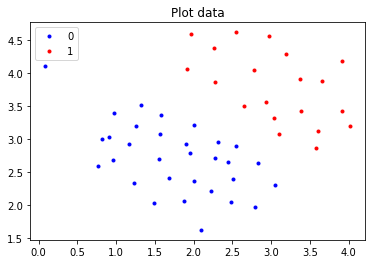

In [101]:
plt.plot(x_0[: ,0], x_0[: ,1], 'b.', label='0')
plt.plot(x_1[: ,0], x_1[: ,1], 'r.', label='1')

plt.title('Plot data')
plt.legend()
plt.show


<function matplotlib.pyplot.show>

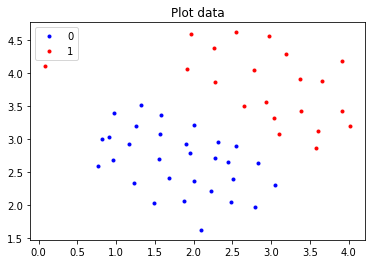

In [102]:
labels_original = np.argmax(y, axis=1)

x_0_original = x[labels_original==0]
x_1_original = x[labels_original==1]

plt.plot(x_0_original[:,0], x_0_original[:,1], 'b.', label='0')
plt.plot(x_1_original[:,0], x_1_original[:,1], 'r.', label='1')

plt.title('Plot data')
plt.legend()
plt.show